In [1]:
def gradient_descent(x0, y0, f, grad_f, alpha, num_iterations):
    """
    Parameters:
        x0, y0: Initial point for the descent.
        f: a function of two variables.
        grad_f: a function that returns the gradient (grad_x, grad_y) of f at (x, y).
        alpha: Learning rate.
        num_iterations: Number of iterations to perform.
    Returns:
        (x, y): The coordinates of the final point after gradient descent.
    """
    x, y = x0, y0  # Initialize x and y with the initial point
    for i in range(num_iterations):
        grad_x, grad_y = grad_f(x, y)  # Obtain the gradient at (x, y)
        # Update x and y by stepping in the opposite direction of the gradient
        x = x - alpha * grad_x
        y = y - alpha * grad_y
    return x, y


In [2]:
def fun_1(x, y):
    return x**2 + y**2

def grad_f_1(x, y):
    grad_x = 2 * x
    grad_y = 2 * y
    return grad_x, grad_y


In [3]:
import numpy as np

def fun_2(x, y):
    return 1 - np.exp(-x**2 - (y-2)**2) - 2 * np.exp(-x**2 - (y+2)**2)


In [4]:
def grad_f_2(x, y):
    grad_x = 2 * x * np.exp(-x**2 - (y-2)**2) + 4 * x * np.exp(-x**2 - (y+2)**2)
    grad_y = 2 * (y-2) * np.exp(-x**2 - (y-2)**2) + 4 * (y+2) * np.exp(-x**2 - (y+2)**2)
    return grad_x, grad_y


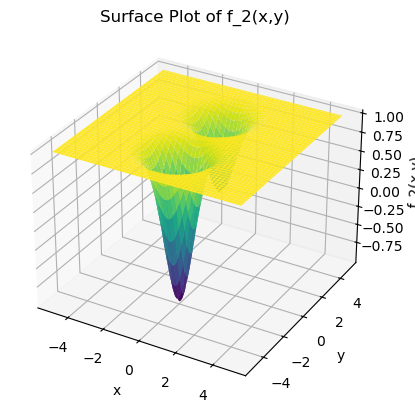

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

# Define grid
X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(X, Y)
z = fun_2(x, y)

# Create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')
ax.set_title('Surface Plot of f_2(x,y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f_2(x,y)')
plt.show()


Test Case 'Start (0,1)' converged to: (0.0000, 2.0000)
Test Case 'Start (0,-1)' converged to: (0.0000, -2.0000)


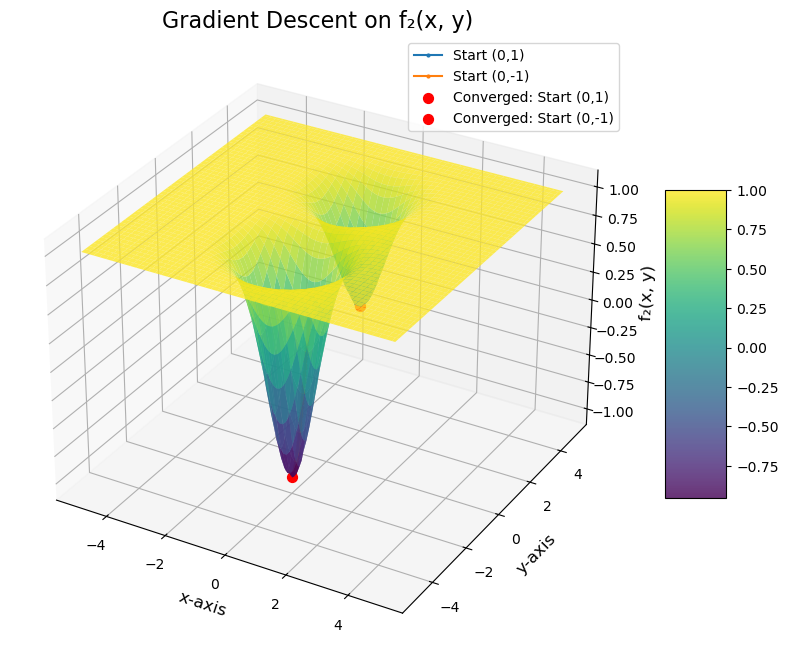

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Enables 3D plotting

# Define the function f2(x, y)
def fun_2(x, y):
    return 1 - np.exp(-x**2 - (y-2)**2) - 2 * np.exp(-x**2 - (y+2)**2)

# Define the gradient of f2(x, y)
def grad_f_2(x, y):
    grad_x = 2 * x * np.exp(-x**2 - (y-2)**2) + 4 * x * np.exp(-x**2 - (y+2)**2)
    grad_y = 2 * (y-2) * np.exp(-x**2 - (y-2)**2) + 4 * (y+2) * np.exp(-x**2 - (y+2)**2)
    return grad_x, grad_y

# Gradient Descent Algorithm
def gradient_descent(x0, y0, f, grad_f, alpha, num_iterations):
    """
    Performs gradient descent on a function f(x, y).

    Parameters:
        x0, y0: Initial coordinates
        f: The function to minimize
        grad_f: Function that returns the gradient (partial derivatives)
        alpha: Learning rate
        num_iterations: Maximum iterations to perform

    Returns:
        (x, y): The final coordinates after convergence
        path: List of points visited during descent
    """
    x, y = x0, y0
    path = [(x, y)]  # Store the path of gradient descent

    for _ in range(num_iterations):
        grad_x, grad_y = grad_f(x, y)  # Compute gradient at (x, y)
        x -= alpha * grad_x  # Update x in opposite direction of gradient
        y -= alpha * grad_y  # Update y in opposite direction of gradient
        path.append((x, y))  # Store the updated point
    
    return (x, y), np.array(path)

# Test cases given in the assignment
test_cases = [
    {"x0": 0, "y0": 1, "alpha": 0.01, "num_iterations": 10000, "label": "Start (0,1)"},
    {"x0": 0, "y0": -1, "alpha": 0.01, "num_iterations": 10000, "label": "Start (0,-1)"},
]

# Solve gradient descent for all test cases and store results
solutions = []
paths = []

for case in test_cases:
    (xf, yf), path = gradient_descent(case["x0"], case["y0"], fun_2, grad_f_2, case["alpha"], case["num_iterations"])
    solutions.append((xf, yf))
    paths.append(path)
    print(f"Test Case '{case['label']}' converged to: ({xf:.4f}, {yf:.4f})")

# Create a range of x and y values from -5 to 5 with 100 points each
x_values = np.linspace(-5, 5, 100)
y_values = np.linspace(-5, 5, 100)

# Generate a grid of (x, y) points for evaluating the function
X, Y = np.meshgrid(x_values, y_values)

# Compute function values at each grid point
Z = fun_2(X, Y)

# Create 3D surface plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plo function surface
surface = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.8)

# Overlay gradient descent paths
for path, case in zip(paths, test_cases):
    ax.plot(path[:, 0], path[:, 1], fun_2(path[:, 0], path[:, 1]), marker="o", markersize=2, label=case["label"])

# Mark final convergence p's
for (xf, yf), case in zip(solutions, test_cases):
    ax.scatter(xf, yf, fun_2(xf, yf), color='red', s=50, label=f"Converged: {case['label']}")

# Add labels + title
ax.set_title('Gradient Descent on f₂(x, y)', fontsize=16)
ax.set_xlabel('x-axis', fontsize=12)
ax.set_ylabel('y-axis', fontsize=12)
ax.set_zlabel('f₂(x, y)', fontsize=12)
ax.legend()

# Add color
fig.colorbar(surface, shrink=0.5, aspect=5)

# Show plot
plt.show()
